In [37]:
import torch
import numpy as np

import matplotlib.pyplot as plt

In [38]:
%matplotlib inline

## Load Vocab

In [39]:
import json 

with open('embedding/vocab.json', 'r') as f:
    data = json.load(f)

len(data)

30000

## Load Embedding

In [40]:
tensor = torch.jit.load("embedding/predictions_embed.pt")

for name, param in tensor.named_parameters():
    embd_tensor = param
    break  # retire le break si tu veux tous les paramètres

# embd_tensor contient maintenant le tensor PyTorch
embeddings = np.array(embd_tensor.detach().numpy())
print(embd_tensor.shape)

torch.Size([30000, 128])


In [41]:
def get_word(embedding: np.array, vocab: list[str], *words) -> tuple[list[str], np.array]:
    found_words = []
    word_embeddings = []
    for w in words:
        if w in vocab:
            index = vocab.index(w)
            found_words.append(w)
            word_embeddings.append(embedding[index])
        else:
            print(f"Mot '{w}' non trouvé dans le vocabulaire.")
    return found_words, np.array(word_embeddings)

In [42]:
liste_mot , embd = get_word(embeddings, data,  "the",
    "food",
    "cake",
    "fruits",
    "bees",
    "animals",
    "war",
    "paris",
    "france",
    "woman",
    "man",
    "you",
    "milk",
    "cow",
    "school",
    "student",
    "nature",
    "plants",
    "time",
    "human",
    "god",
    "queen",
    "king",)

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, random_state=42)
reduced = tsne.fit_transform(embd)

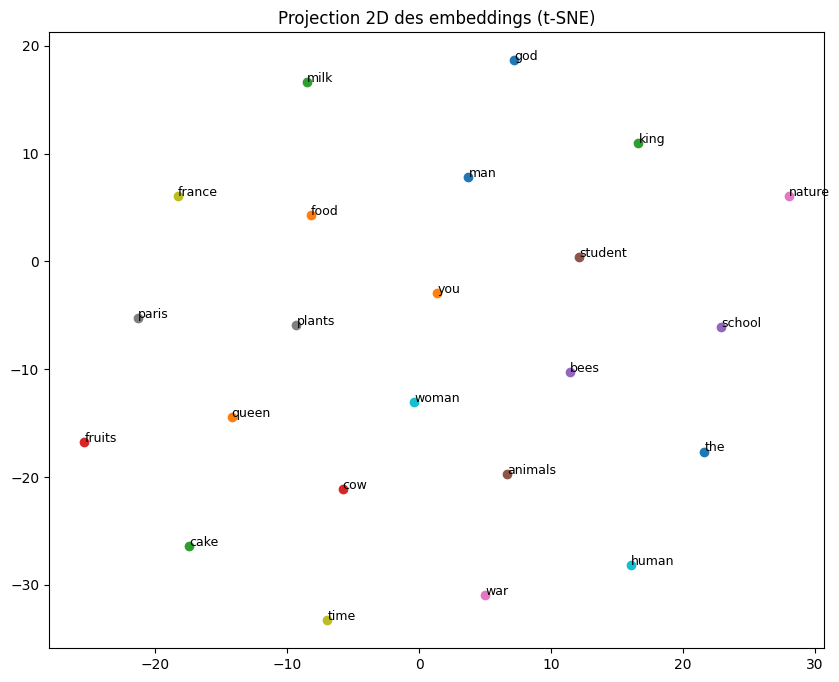

In [44]:
plt.figure(figsize=(10, 8))
for i, word in enumerate(liste_mot):
    x, y = reduced[i, 0], reduced[i, 1]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, word, fontsize=9)
plt.title("Projection 2D des embeddings (t-SNE)")
plt.show();

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=20, random_state=42)
reduced = tsne.fit_transform(embd)

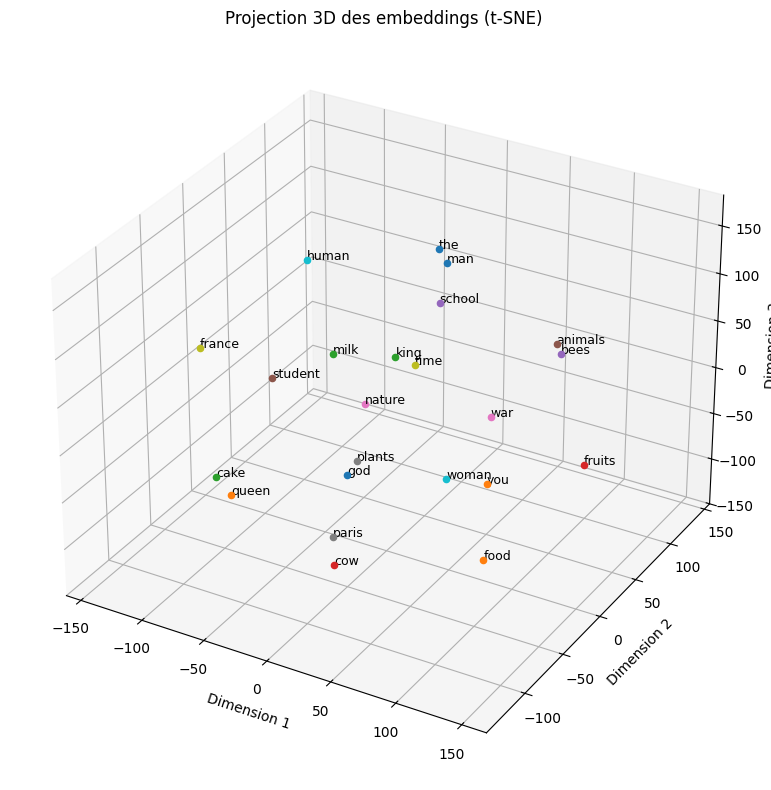

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(liste_mot):
    x, y, z = reduced[i, 0], reduced[i, 1], reduced[i, 2]
    ax.scatter(x, y, z, marker='o')
    ax.text(x+0.01, y+0.01, z+0.01, word, fontsize=9)

ax.set_title('Projection 3D des embeddings (t-SNE)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Pour permettre la rotation interactive du graphique
plt.tight_layout()
plt.show()

In [47]:
# Visualisation 3D interactive avec Plotly
import plotly.graph_objects as go

# Création du nuage de points 3D
fig = go.Figure(data=[go.Scatter3d(
    x=reduced[:, 0],
    y=reduced[:, 1],
    z=reduced[:, 2],
    mode='markers+text',
    text=liste_mot,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        size=5,
        color=list(range(len(liste_mot))),
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Mise en forme du graphique
fig.update_layout(
    scene=dict(
        xaxis_title='Dim1',
        yaxis_title='Dim2',
        zaxis_title='Dim3'
    ),
    width=900,
    height=800,
    margin=dict(l=0, r=0, b=0, t=30)
)

# Affichage du graphique interactif
fig.show()